In [2]:
#Блок import-ов
from random import *
import numpy as np
from scipy.stats import uniform
import os
from math import sqrt
import matplotlib.pyplot as plt
from scipy.special import factorial 
from scipy.stats import chisquare
from scipy.stats import ttest_ind
from scipy.stats import f
from scipy.stats import probplot
from scipy.stats import norm
from scipy.stats import invgauss
from time import time
from scipy.stats.distributions import chi2
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# Задание №7

### Блок функций

In [12]:
#функция для задания №7.1
def F_7(x,y):
    return x**3*np.sin(1/x) + 10*x*y**4*np.cos(1/y)

In [4]:
#функция для задания №7.2
def G_7(x,y):
    return (x - 1)**2 + 100*(y - x**2)**2


In [5]:
#функция изменения температуры 
def T(initialTemperature, i):
    #return initialTemperature * 0.1 /i
    return initialTemperature/i**3

In [6]:
#Реализация метода отжига
def Simulated_annealing(t_b,s_b,func):#начальное время; начальное положение; функция по которой минимизуруем
    t_min = 1e-7
    F_0 = func(s_b[0],s_b[1])
    r = 2
    i = 1
    t_0 = t_b
    while t_b > t_min:
        s_new = np.random.rand(1,2)[0]*np.sqrt(t_0)+ s_b
        F_1 = func(s_new[0],s_new[1])
        if F_1 - F_0 < 0:
            F_0 = F_1
            s_b = s_new
            t_b = T(t_b,i)
            i += 1
        else:
            p = np.exp(-(F_1 - F_0)/t_b)
            if np.random.rand() < p:
                s_b = s_new
                F_0 = F_1
                t_b = T(t_b,i)
                i += 1
    return [s_b, F_0, t_b]         

### Блок вывода/визуализации

### Задание №7.1

In [14]:
n = 10000#количество итераций
F_7_min = 0#минимальное значение функции
x_min = 0#min координата x
y_min = 0#min координата y
for i in range(n):
    psi = 2*np.pi*np.random.rand()
    x = np.cos(psi)
    y = np.sin(psi)
    f_value = F_7(x,y)
    if (f_value < F_7_min):
        F_7_min = f_value
        x_min = x
        y_min = y
print('x_min =',x_min,'; y_min =', y_min)
print('F_7_min =',F_7_min)

x_min = -0.35748882496524775 ; y_min = -0.9339174160625587
F_7_min = -1.288488979392037


### Задание №7.2

In [10]:
t_b = 1#начальная температура (конечная температура определена в функции Simulated_annealing )
s_b = np.array([0,0])#начальное положение
a,b,c = Simulated_annealing(t_b,s_b,G_7)
print('(x,y) =',a)
print('G_7(x,y) =',b)
print('T =',c)

(x,y) = [1.40284545 1.96883446]
G_7(x,y) = 0.1623582635345864
T = 2.6791838134430728e-09


# Задание №8

### Блок вывода/визуализации

In [15]:
s = 0.1#шаг
N = 100000#количество итераций
x = np.arange(-1.2,1.2,s)
y = np.arange(-1.2,1.2,s)
n = x.size
X, Y = np.meshgrid(x,y)
Z = (X**2) + (Y**2)
b_mas = np.zeros([n,n], dtype = bool)#матрица булевых значений для точек круга 

In [16]:
#заполняем b_mas
for i in range(1,n-1):
    for j in range(1,n-1):
        if Z[i][j] < 1 and (Z[i-1][j] > 1):
            b_mas[i][j] = True
        if Z[i][j] < 1 and (Z[i+1][j] > 1):
            b_mas[i][j] = True
        if Z[i][j] < 1 and (Z[i][j-1] > 1):
            b_mas[i][j] = True
        if Z[i][j] < 1 and (Z[i][j+1] > 1):
            b_mas[i][j] = True
        if Z[i][j] >= 1:
            b_mas[i][j] = np.nan

In [17]:
val = np.zeros([n,n])#матрица значений
counter = np.zeros([n,n])#матрица счетчик для каждой точки

In [18]:
#определяем начальное положение
while True:
    k = np.random.randint(n)
    l = np.random.randint(n)
    if x[k]**2 + y[l]**2 < 1:
        break

In [19]:
#основной цикл
cur_pos = np.array([k,l])
for i in range(N):
    if b_mas[cur_pos[0]][cur_pos[1]]:
        val[cur_pos[0]][cur_pos[1]] = X[cur_pos[0]][cur_pos[1]]**2 - Y[cur_pos[0]][cur_pos[1]]**2  #Func(x[cur_pos[0]],y[cur_pos[1]])
        counter[cur_pos[0]][cur_pos[1]] = 1
        se_t = set()
        if b_mas[cur_pos[0] + 1][cur_pos[1]] == False:
            se_t.add(0)
        if b_mas[cur_pos[0] - 1][cur_pos[1]] == False:
            se_t.add(1)
        if b_mas[cur_pos[0]][cur_pos[1] + 1] == False:
            se_t.add(2)
        if b_mas[cur_pos[0]][cur_pos[1] - 1] == False:
            se_t.add(3)    
        el = np.random.randint(4)
        while not (el in se_t):
            el = np.random.randint(4)
        if el == 0:
            cur_pos[0] += 1
        elif el == 1:
            cur_pos[0] -= 1
        elif el == 2:
            cur_pos[1] += 1
        elif el == 3: 
            cur_pos[1] -= 1
    else:
        val[cur_pos[0]][cur_pos[1]] +=  X[cur_pos[0]][cur_pos[1]]**2 - Y[cur_pos[0]][cur_pos[1]]**2  #Func(x[cur_pos[0]],y[cur_pos[1]])
        counter[cur_pos[0]][cur_pos[1]] += 1
        el = np.random.randint(4)
        if el == 0:
            cur_pos[0] += 1
        elif el == 1:
            cur_pos[0] -= 1
        elif el == 2:
            cur_pos[1] += 1
        elif el == 3: 
            cur_pos[1] -= 1
        

In [20]:
counter[counter == 0] = np.inf

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


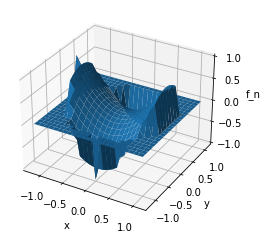

In [24]:
#численный график
X, Y = np.meshgrid(x,y)
ax = plt.axes(projection='3d')
G = val/counter
ax.plot_surface(X, Y, G)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f_n')
plt.savefig('8_1.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


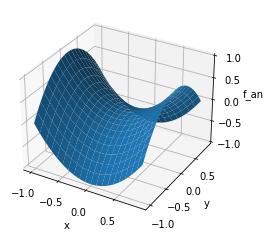

In [23]:
#аналитический график
X,Y = np.meshgrid(np.arange(-1,1,s),np.arange(-1,1,s))
Z = X**2 - Y**2
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f_an')
plt.savefig('8_2.eps')

# Задание №9

### Блок функций

In [28]:
#Моделирование Винеровского процесса
def Pr_wiener(sigma_sqr, n): 
    W = np.zeros(n + 1)
    W[n] = np.sqrt(sigma_sqr) * np.random.randn()
    s = n
    f_1 = n//2
    h = 1
    for i in range(int(np.log2(n))):
        h /= 2
        s_1 = np.random.randn(2**i) * np.sqrt(h / 2) * np.sqrt(sigma_sqr)
        s_2 = (W[:-1:s] + W[s::s]) / 2
        W[f_1::s] = s_1 + s_2
        f_1, s = f_1 // 2, s // 2
    return W

In [32]:
#Моделирование процесса О-У
def Pr_OU(sigma_sqr, lamb, n): 
    OU = np.zeros(n + 1)
    OU[0] = np.random.randn() * np.sqrt(sigma_sqr)
    OU[n] = np.sqrt(sigma_sqr) * np.sqrt(1 - np.exp(-2 * lamb)) * np.random.randn() + OU[0] * np.exp(-lamb)
    s = n
    f_1 = n // 2
    h = 1
    for i in range(int(np.log2(n))):
        h = h/2
        s_1 = np.random.randn(2**i) * np.sqrt(sigma_sqr) * np.sqrt((np.exp(2 * h * lamb) - 1) / (np.exp(2 * h * lamb) + 1))
        s_2 = (OU[:-1:s] + OU[s::s]) / (np.exp(lamb * h) + np.exp(-lamb * h))
        OU[f_1::s] =  s_1 + s_2
        f_1, s = f_1 // 2, s // 2
    return OU

### Блок вывода/визуализации

### Траектория Винеровского процесса

In [29]:
n = 2**15
sigma_sqr = 1
W = Pr_wiener(sigma_sqr, n)
x = np.linspace(0, 1, n + 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


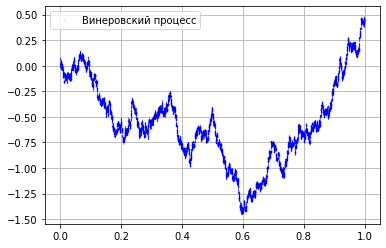

In [30]:
fig = plt.figure()
plt.plot(x,W,'b.',ms = 0.2, label = 'Винеровский процесс')
plt.legend()
plt.grid(True)
plt.savefig('9_1.eps')

### Траектория процесса Орштейна-Уленбека

In [33]:
n = 2**17
sigma_sqr = 1
lamb = 1
OU = Pr_OU(sigma_sqr, lamb, n)
x = np.linspace(0, 1, n + 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


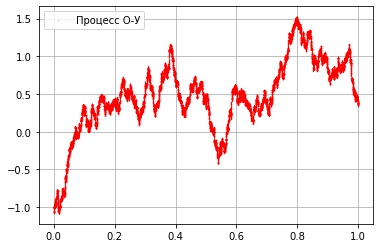

In [35]:
fig = plt.figure()
plt.plot(x,OU,'r.',ms = 0.2, label = 'Процесс О-У')
plt.legend()
plt.grid(True)
plt.savefig('9_2.eps')

# Задание №10

### Блок функций

In [58]:
#Моделирование процесса О-У
def Pr_OU(sigma_sqr, lamb, n): 
    OU = np.zeros(n + 1)
    OU[0] = np.random.randn() * np.sqrt(sigma_sqr)
    OU[n] = np.sqrt(sigma_sqr) * np.sqrt(1 - np.exp(-2 * lamb)) * np.random.randn() + OU[0] * np.exp(-lamb)
    s = n
    f_1 = n // 2
    h = 1
    for i in range(int(np.log2(n))):
        h = h/2
        s_1 = np.random.randn(2**i) * np.sqrt(sigma_sqr) * np.sqrt((np.exp(2 * h * lamb) - 1) / (np.exp(2 * h * lamb) + 1))
        s_2 = (OU[:-1:s] + OU[s::s]) / (np.exp(lamb * h) + np.exp(-lamb * h))
        OU[f_1::s] =  s_1 + s_2
        f_1, s = f_1 // 2, s // 2
    return OU

In [59]:
#Генератор с.в. Коши
def Cauchyrnd(x_0,ips,varargin):
    #F^(-1)(Y ~ U(0,1)) = X - с.в. Коши
    x = uniform.rvs(size = varargin)
    ans = x_0 + ips*np.tan(np.pi*(x - 1/2))
    return ans

In [60]:
#Фильтр Калмана
def F_Kalman(y, A, M, r):
    n = y.size
    r_k, x_o = np.zeros(n), np.zeros(n)
    x_o[0] = y[0]
    r_k[0] = r
    for i in range(n-1):
        x_pr = A * x_o[i]
        r_pr = A**2 * r_k[i] + M
        dif = y[i+1] - x_pr
        k = r_pr / (r_pr + r)
        x_o[i+1] = x_pr + k * dif
        r_k[i+1] = (1 - k) * r_pr
    return [x_o, r_k]

### Задание №10.1

In [81]:
#нормальный шум
n = 2**14
n_h = n + 1
sigma_sqr = 1
lamb = 0.01
r = 0.01
noise = np.sqrt(r) * np.random.randn(n_h)
OU = Pr_OU(sigma_sqr, lamb, n)
OU_n = OU + noise
x_ls = np.linspace(0, 1, n_h)

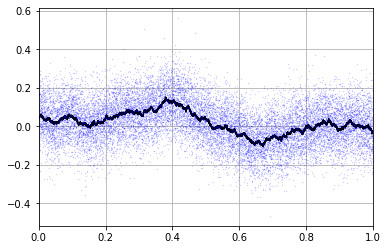

In [82]:
plt.plot(x_ls, OU, 'k', alpha = 1, ms=0.05)
plt.plot(x_ls,OU_n,'b.',alpha = 0.3, ms = 0.5)
plt.grid(True)
plt.xlim([0,1])
plt.savefig('10_1.pdf')

### Задание №10.2

In [83]:
#Фильтр Калмана
s = 1 / n
A = np.exp(-lamb * s)
M = sigma_sqr * (1 - np.exp(-2 * lamb * s))
filt, err = F_Kalman(OU_n, A, M, r) 

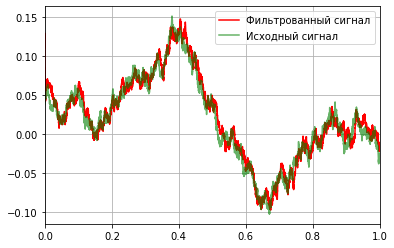

In [85]:
fig = plt.figure()
#plt.plot(ls,y,'b.',ms = 0.5)
plt.plot(x_ls,filt,'r',label = 'Фильтрованный сигнал')
plt.plot(x_ls,OU,'g',alpha = 0.6,label = 'Исходный сигнал')
plt.grid(True)
plt.xlim(0,1)
plt.legend()
plt.savefig('10_2.pdf')

### Задание №10.3

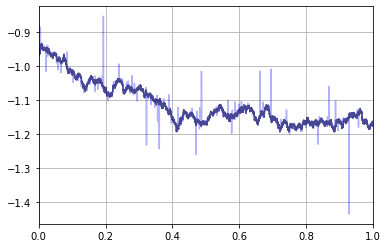

In [86]:
#Шум имеет распределение Коши
n = 2**14
s = 1/n
x_0 = 1
ips = 1
d = 0.0001
noise = Cauchyrnd(x_0,ips,n+1)*d
OU = Pr_OU(sigma_sqr, lamb, n)
OU_n = OU + noise
fig = plt.figure()
plt.plot(x_ls, OU, 'k', alpha=0.6, ms=0.05)
plt.plot(x_ls,OU_n,'b',alpha = 0.3, ms = 0.5)
plt.grid(True)
plt.xlim([0,1])
plt.savefig('10_3.pdf')

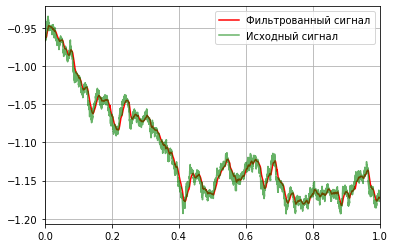

In [87]:
filtered, err = F_Kalman(OU_n, A, M, r) 
fig = plt.figure()
#plt.plot(ls,y,'b.',ms = 0.5)
plt.plot(x_ls,filtered,'r',label = 'Фильтрованный сигнал')
plt.plot(x_ls,OU,'g',alpha = 0.6,label = 'Исходный сигнал')
plt.grid(True)
plt.xlim(0,1)
plt.legend()
plt.savefig('10_4.pdf')

# Задание №11

### Блок функций

In [88]:
#Пуассоновский процесс
def Poisprc(T, lamb): 
    n = np.random.poisson(lamb * T)
    return np.sort(np.random.rand(n) * T)

In [89]:
#Симуляция очереди для №11.1
def Queue_sim(T,tt,k,lamb,Gen_monent_func):
    t = Gen_monent_func(T,lamb)
    n = t.size
    n_1 = tt.size
    chi2 = (np.random.randn(k, n)**2).sum()
    x = np.zeros(n)
    x = t + chi2
    for i in range(n-1):
        if x[i] > x[i+1]:
            x[i+1] = x[i] + ch2[i + 1]
    N = np.zeros(n_1)        
    for i in range(n):
        N += (tt > t[i]) * (tt < x[i])
    return [N,t,chi2,x]    

In [90]:
#Циклическая интенсивность lamb*(1 + cos(t))
def Lmb(lamb):
    return lambda t: lamb * (1 + np.cos(t))

In [91]:
def Inh_pois_pr(T, lamb, lamb_m = 2): 
    n = np.random.poisson(lamb_m * T)
    t = np.sort(np.random.rand(n) * T)
    index = (np.random.rand(n)) < (lamb(t) / lamb_m)
    return t[index]

In [114]:
def Sim_ins_comp_work(tt, T, lamb, k, w, c):
    t = Poisprc(T, lamb)
    n = t.size
    xi = (1 - np.random.rand(n))**(-1 / k)
    W_t = w + c * tt - pois_proc_fun(tt, t, xi)
    index = np.nonzero(W_t < 0)[0]
    l = np.size(index)
    #W_t[index[0]:] = ~index.size
    if l:
        W_t[index[0]:] = 0
    return W_t

In [112]:
def pois_proc_fun(tt, t, xi=np.array([])): # returns vector N(tt) for poisson process with points t and jumps xi
    if not xi.size:
        xi = np.ones(tt.size)
    res = np.zeros(tt.size)
    for i in range(0, t.size):
        res += xi[i] * (tt >= t[i])
    return res

### Блок вывода/визуализации

### Задание №11.1

In [93]:
#Система массового обсулижвания
T = 100 
k = 10
n = 1000
lamb = 0.2
t = np.linspace(0, T, n)
#t_h = Poisprc(T,lamb)
N, t_f, chi2, x = Queue_sim(T,t,k, lamb, Poisprc)
z_ls = np.zeros(t_f.size)

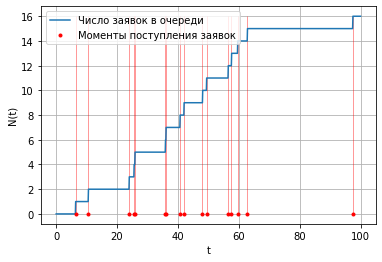

In [97]:
fig = plt.figure()
plt.plot(t,N,label = 'Число заявок в очереди')
plt.plot(t_f, z_ls, 'r.', label='Моменты поступления заявок')
plt.vlines(t_f,0,np.max(N),'r', alpha = 0.4,linewidth = 1)
plt.legend()
plt.xlabel('t')
plt.ylabel('N(t)')
plt.grid(True)
plt.savefig('11_1.pdf')

### Задание №11.2

In [98]:
#Система массового обслуживания с циклической интенсивностью и единичными скачками
T = 6 * np.pi
k = 10
lamb = 10
t = np.linspace(0, T, 1000)
N_t, t_f, chi2, x = Queue_sim(T,t,k, Lmb(lamb), Inh_pois_pr)
z_ls = np.zeros(t_f.size)

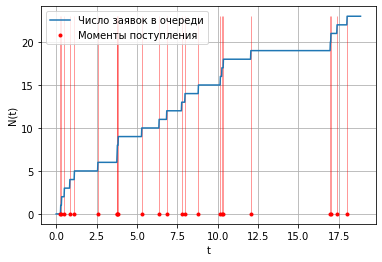

In [99]:
fig = plt.figure()
plt.plot(t,N_t,label = 'Число заявок в очереди')
plt.plot(t_f,z_ls,'r.',label = 'Моменты поступления')
plt.vlines(t_f,0,np.max(N_t),'r', alpha = 0.4,linewidth = 1)
plt.xlabel('t')
plt.ylabel('N(t)')
plt.grid(True)
plt.legend()
plt.savefig('11_2.pdf')

### Задание №11.3

In [115]:
#Работа страховой компании
T = 100
lamb = 0.9 
k = 2
w = 30
c = 2
t = np.linspace(0, T, 1000)
Res_c = Sim_ins_comp_work(t, T, lamb, k, w, c)

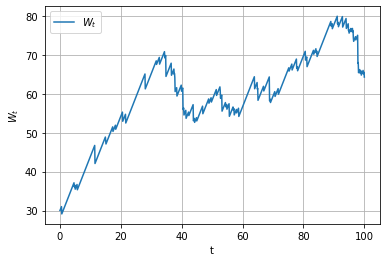

In [116]:
fig = plt.figure()
plt.plot(t,Res_c,label = '$W_t$')
plt.xlabel('t')
plt.ylabel('$W_t$')
plt.grid(True)
plt.legend()
plt.savefig('11_3.pdf')